Target:
* Reduce overfitting by adding Batch Normalization to every convolution block till the Adaptive Average Pool layer

Result:
* Num parameters: 9194
* Max Train accuracy (in 15 epochs): 99.4%.
* Max test accuracy (in 15 epochs): 99.4%

Analysis:
*  Compared the previous model, the magnitude of overfit has considerably reduced.
* The training accuracy is plateauing at 99.4% after epoch 14.
* The model still has ~ 1200 more parameters than the desired target so I need to fix that in the next model iteration.

In [2]:
!git clone "https://github.com/jyanivaddi/ERA_V1.git"
!git pull

Cloning into 'ERA_V1'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 186 (delta 82), reused 113 (delta 33), pack-reused 0
Receiving objects: 100% (186/186), 3.41 MiB | 5.14 MiB/s, done.
Resolving deltas: 100% (82/82), done.
fatal: not a git repository (or any of the parent directories): .git


Add all the imports

In [3]:
from __future__ import print_function
import sys
sys.path.append("ERA_V1/session_7")
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from s7_utils import load_mnist_data, preview_batch_images, plot_statistics
from s7_model import Model_3_Net, model_summary, model_train, model_test

Allocate GPU

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
mnist_model = Model_3_Net().to(device)
model_summary(mnist_model, input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
            Conv2d-4           [-1, 10, 24, 24]             900
       BatchNorm2d-5           [-1, 10, 24, 24]              20
              ReLU-6           [-1, 10, 24, 24]               0
            Conv2d-7           [-1, 10, 22, 22]             900
       BatchNorm2d-8           [-1, 10, 22, 22]              20
              ReLU-9           [-1, 10, 22, 22]               0
           Conv2d-10           [-1, 10, 20, 20]             900
      BatchNorm2d-11           [-1, 10, 20, 20]              20
             ReLU-12           [-1, 10, 20, 20]               0
        MaxPool2d-13           [-1, 10, 10, 10]               0
           Conv2d-14             [-1, 1

Define Transforms

In [5]:
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

Download Data

In [6]:
train_data, test_data = load_mnist_data(train_transforms, test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 190232581.92it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 121500194.41it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 64153051.37it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 23519171.32it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



Define train and test loaders

In [7]:
torch.manual_seed(1)
batch_size = 128
kwargs = {'num_workers': 2, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle = True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, **kwargs)

Preview data

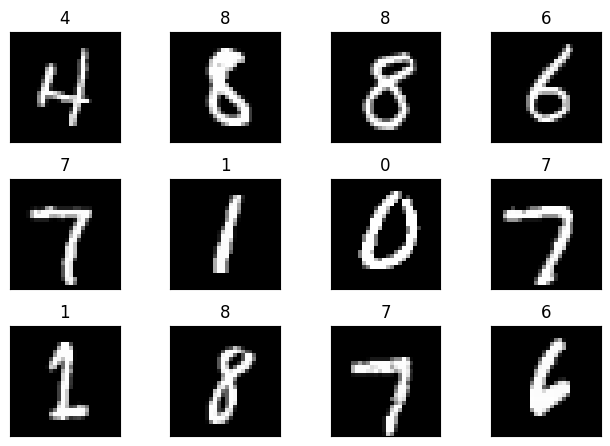

In [8]:
preview_batch_images(train_loader)

In [9]:
model = Model_3_Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
train_losses = []
test_losses = []
train_acc = []
test_acc = []
for epoch in range(1,20):
    print(f"epoch: {epoch}")
    model_train(model, device, train_loader, optimizer, train_acc, train_losses)
    model_test(model, device, test_loader, test_acc, test_losses)


epoch: 1


loss=0.16359218955039978 batch_id=468 Accuracy = 93.15: 100%|██████████| 469/469 [00:17<00:00, 27.10it/s]



Test set: Average loss: 0.0915, Accuracy: 9848/10000 (98.48%)

epoch: 2


loss=0.07307221740484238 batch_id=468 Accuracy = 98.34: 100%|██████████| 469/469 [00:16<00:00, 28.44it/s]



Test set: Average loss: 0.0577, Accuracy: 9894/10000 (98.94%)

epoch: 3


loss=0.06655877828598022 batch_id=468 Accuracy = 98.67: 100%|██████████| 469/469 [00:16<00:00, 28.66it/s]



Test set: Average loss: 0.0498, Accuracy: 9890/10000 (98.90%)

epoch: 4


loss=0.0198503565043211 batch_id=468 Accuracy = 98.86: 100%|██████████| 469/469 [00:16<00:00, 28.41it/s]



Test set: Average loss: 0.0464, Accuracy: 9903/10000 (99.03%)

epoch: 5


loss=0.014598135836422443 batch_id=468 Accuracy = 98.97: 100%|██████████| 469/469 [00:16<00:00, 28.27it/s]



Test set: Average loss: 0.0384, Accuracy: 9905/10000 (99.05%)

epoch: 6


loss=0.07741480320692062 batch_id=468 Accuracy = 98.97: 100%|██████████| 469/469 [00:16<00:00, 28.54it/s]



Test set: Average loss: 0.0274, Accuracy: 9941/10000 (99.41%)

epoch: 7


loss=0.04807579517364502 batch_id=468 Accuracy = 99.14: 100%|██████████| 469/469 [00:16<00:00, 28.21it/s]



Test set: Average loss: 0.0328, Accuracy: 9917/10000 (99.17%)

epoch: 8


loss=0.010638493113219738 batch_id=468 Accuracy = 99.18: 100%|██████████| 469/469 [00:16<00:00, 28.37it/s]



Test set: Average loss: 0.0367, Accuracy: 9906/10000 (99.06%)

epoch: 9


loss=0.03017200529575348 batch_id=468 Accuracy = 99.18: 100%|██████████| 469/469 [00:17<00:00, 26.42it/s]



Test set: Average loss: 0.0266, Accuracy: 9941/10000 (99.41%)

epoch: 10


loss=0.035682737827301025 batch_id=468 Accuracy = 99.31: 100%|██████████| 469/469 [00:16<00:00, 28.11it/s]



Test set: Average loss: 0.0252, Accuracy: 9937/10000 (99.37%)

epoch: 11


loss=0.015378516167402267 batch_id=468 Accuracy = 99.33: 100%|██████████| 469/469 [00:17<00:00, 27.30it/s]



Test set: Average loss: 0.0272, Accuracy: 9934/10000 (99.34%)

epoch: 12


loss=0.016634874045848846 batch_id=468 Accuracy = 99.34: 100%|██████████| 469/469 [00:16<00:00, 27.81it/s]



Test set: Average loss: 0.0240, Accuracy: 9943/10000 (99.43%)

epoch: 13


loss=0.06909997761249542 batch_id=468 Accuracy = 99.42: 100%|██████████| 469/469 [00:16<00:00, 27.73it/s]



Test set: Average loss: 0.0252, Accuracy: 9942/10000 (99.42%)

epoch: 14


loss=0.014718177728354931 batch_id=468 Accuracy = 99.42: 100%|██████████| 469/469 [00:16<00:00, 28.31it/s]



Test set: Average loss: 0.0244, Accuracy: 9940/10000 (99.40%)

epoch: 15


loss=0.0254767294973135 batch_id=468 Accuracy = 99.42: 100%|██████████| 469/469 [00:16<00:00, 28.08it/s]



Test set: Average loss: 0.0263, Accuracy: 9933/10000 (99.33%)

epoch: 16


loss=0.01891533099114895 batch_id=468 Accuracy = 99.41: 100%|██████████| 469/469 [00:16<00:00, 27.93it/s]



Test set: Average loss: 0.0252, Accuracy: 9935/10000 (99.35%)

epoch: 17


loss=0.0488571859896183 batch_id=468 Accuracy = 99.48: 100%|██████████| 469/469 [00:16<00:00, 27.99it/s]



Test set: Average loss: 0.0269, Accuracy: 9929/10000 (99.29%)

epoch: 18


loss=0.058273881673812866 batch_id=468 Accuracy = 99.52: 100%|██████████| 469/469 [00:16<00:00, 27.63it/s]



Test set: Average loss: 0.0216, Accuracy: 9951/10000 (99.51%)

epoch: 19


loss=0.05020907148718834 batch_id=468 Accuracy = 99.50: 100%|██████████| 469/469 [00:16<00:00, 27.88it/s]



Test set: Average loss: 0.0249, Accuracy: 9934/10000 (99.34%)



Plot Statistics

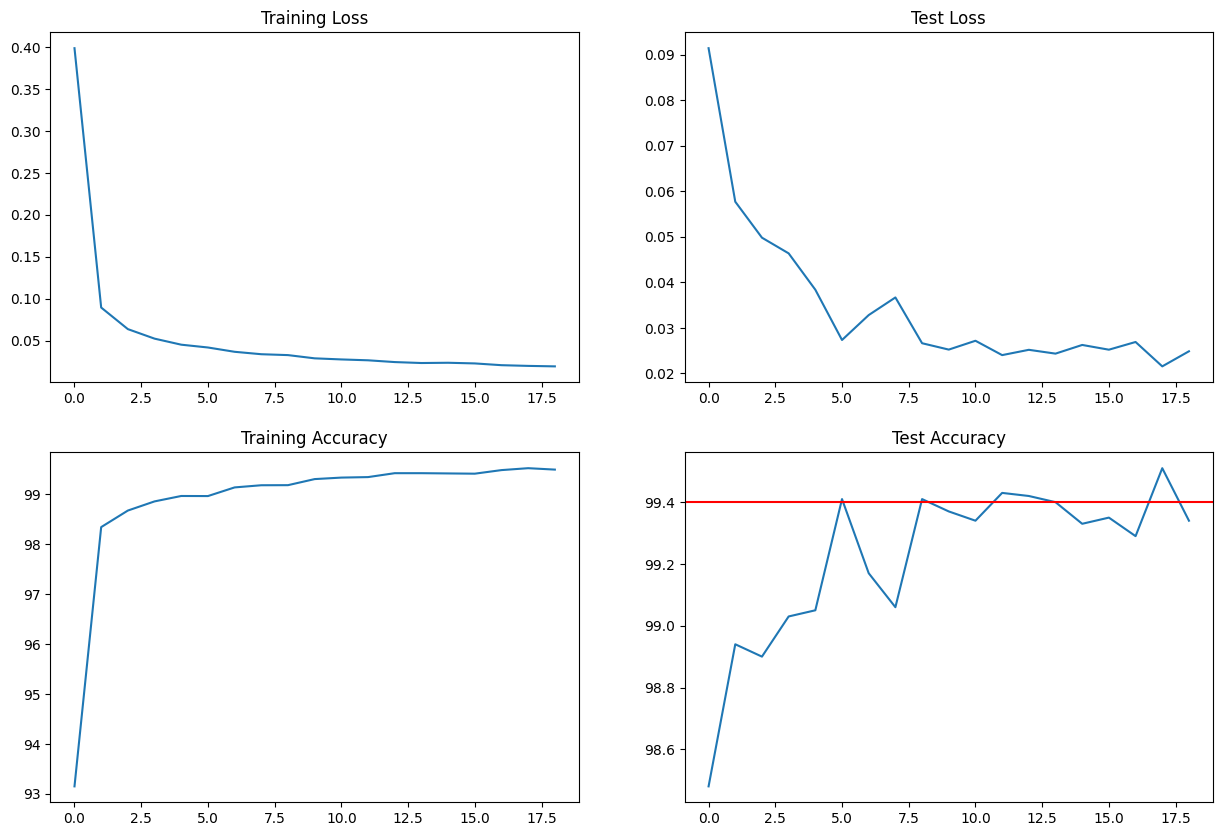

In [10]:
plot_statistics(train_losses, train_acc, test_losses, test_acc)